# Credit Card Fraud Detection

## Problem Satement
Build a machine learning model to identify fraudulent credit card 
transactions.

### Importing Pandas and Numpy for dataset reading and linear algebra operations.

In [1]:
import pandas as pd
import numpy as np

**Loading the dataset**

In [2]:
df= pd.read_csv("dataset/card.csv")

**Exploring the data**

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


**Getting the shape of the data**

In [4]:
df.shape

(284807, 31)

**Handling the missing values**

In [5]:
df.isna().sum().sort_values()

Time      0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
Amount    0
V15       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V1        0
V14       0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Defining the fraud**

In [7]:
f = df[df['Class'] == 1]
v = df[df['Class'] == 0]

print('There are {} fraudulent transactions'.format(f.shape[0]))
print('There are {} valid transcations'.format(v.shape[0]))

There are 492 fraudulent transactions
There are 284315 valid transcations


**Getting the information about the Fraudelent transactions**

In [8]:
f.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Getting the information about the Valid transactions**

In [9]:
v.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Importing Libraries for Data Visualisation

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

**Visualizing the Mean Transaction Amount**

Text(0, 0.5, 'Mean Transcation Amount')

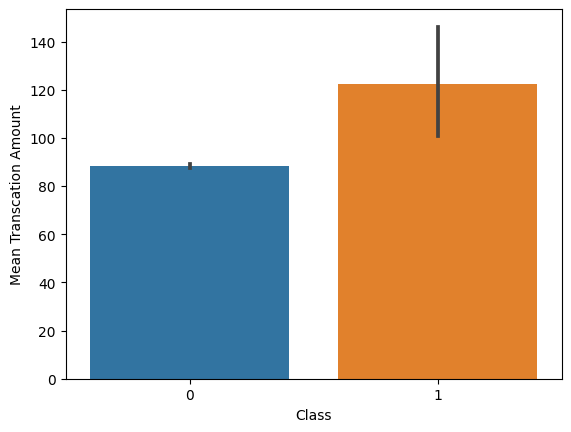

In [11]:
sns.barplot(data=df,x='Class', y='Amount')
plt.ylabel('Mean Transcation Amount')

## Importing some ML Models and Algortihms for Data Pre-processing

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [13]:
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

X = data_matrix[:, 1:30]

y = data_matrix[:, 30]

X = normalize(X, norm="l2")

print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (284807, 29) y.shape= (284807,)


## Splitting the dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (199364, 29) Y_train.shape= (199364,)
X_test.shape= (85443, 29) Y_test.shape= (85443,)


**Plotting the correlation matrix**

<Axes: >

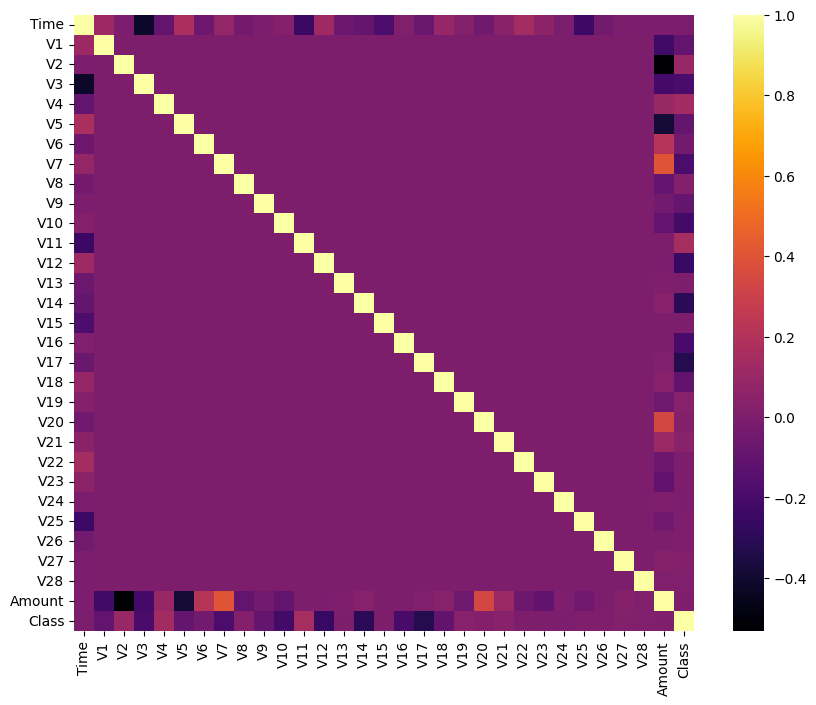

In [15]:
corr = df.corr()
fig = plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap='inferno')

**The HeatMap reveals that the majority of features show little to no correlation with each other. However, some features exhibit either a positive or negative correlation. Notably, V2 and V5 demonstrate a strong negative correlation with the "Amount" feature, while there is also some correlation between V20 and "Amount." This analysis provides us with valuable insights into the underlying data.**

### Buliding the Logistic Regression and Random Forest Models

In [16]:
names=[]
scores=[]

models ={
         'Logistic Regression': LogisticRegression(),
         'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    names.append(name)
    scores.append(score)

In [17]:
results = pd.DataFrame({'model': names, 'score': scores})

results.sort_values(by='score', ascending=False)

,model,score
1,Random Forest,0.999415
0,Logistic Regression,0.999309


**Since Random Forest has more accuracy**

**Define the Random Forest as it perfoms best**

In [18]:
rforest = RandomForestClassifier()

rforest.fit(X_train,y_train)

y_pred = rforest.predict(X_test)

score = accuracy_score(y_pred, y_test)

print(score)

0.9994265182636377


**Evaluating the model's performance using metrics like precision, recall, and F1-score to assess its effectiveness in detecting fraud.**

In [19]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85295
         1.0       0.97      0.69      0.81       148

    accuracy                           1.00     85443
   macro avg       0.99      0.84      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### Performing undersampling/oversampling
**Undersampling and oversampling are techniques to tackle class imbalance in machine learning, specifically in binary classification tasks where one class is much more prevalent than the other. They aim to enhance model performance by adjusting the class distribution in the dataset.**

In [20]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

**Now we have a Random Forest supervised classification model to predict credit card fraud.**

In [21]:
# Apply Random Under-Sampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Apply Random Over-Sampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [22]:
# Train a Random Forest Classifier on the resampled data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9994733330992591
Confusion Matrix:
[[85292     3]
 [   42   106]]


**Re-evaluating the model's performance using metrics like precision, recall, and F1-score to assess its effectiveness in detecting fraud.**

In [24]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85295
         1.0       0.97      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



**Confusion Matrix Plotting**

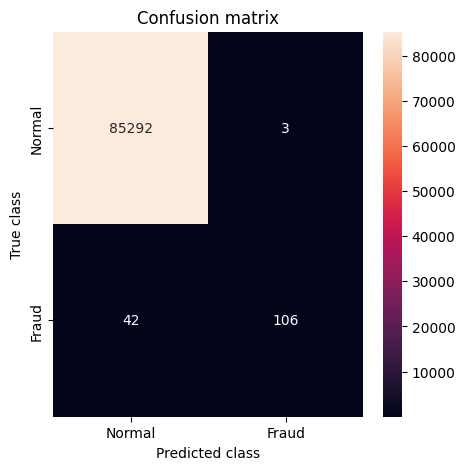

In [25]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()